# NBA Player Stats Prediction

**Team Members:** Ryan, Momoka, Jesus, Angel, Harshil   
**Course:** CS4661 - Introduction to Data Science  
**Objective:** Predict NBA player statistics using machine learning

---

## Project Overview

This notebook demonstrates a complete machine learning pipeline for predicting NBA player statistics:
- **Target Variables:** PTS (total points scored) and team win classifiction
- **Models:** Linear Regression, Random Forest, Gradient Boosting
- **Approach:** Modular, reusable functions for scalability and maintainability

## 1. Imports and Setup

In [1]:
import data_utils
import training
import analysis_visuals

## 2. Load and Explore Data

In [2]:
# Load dataset (only need to do this once!)
player_stats_df = data_utils.load_nba_data()

Path to dataset files: /Users/ryan/.cache/kagglehub/datasets/eduardopalmieri/nba-player-stats-season-2425/versions/37

Available CSV files: ['database_24_25.csv']

DATASET OVERVIEW

Dataset shape: (16512, 25)

Column names:
['Player', 'Tm', 'Opp', 'Res', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', 'Data']

First few rows:
          Player   Tm  Opp Res     MP  FG  FGA    FG%  3P  3PA  ...  DRB  TRB  \
0   Jayson Tatum  BOS  NYK   W  30.30  14   18  0.778   8   11  ...    4    4   
1  Anthony Davis  LAL  MIN   W  37.58  11   23  0.478   1    3  ...   13   16   
2  Derrick White  BOS  NYK   W  26.63   8   13  0.615   6   10  ...    3    3   
3   Jrue Holiday  BOS  NYK   W  30.52   7    9  0.778   4    6  ...    2    4   
4  Miles McBride  NYK  BOS   L  25.85   8   10  0.800   4    5  ...    0    0   

   AST  STL  BLK  TOV  PF  PTS  GmSc        Data  
0   10    1    1    1   1   37  38.1  2024-10-

In [3]:
team_stats_df = data_utils.aggregate_team_game_stats(player_stats_df)
team_stats_df

,Tm,Opp,Data,Res,FG,FGA,3P,3PA,FT,FTA,...,AST,STL,BLK,TOV,PF,MP,team_fg_pct,team_3p_pct,team_ft_pct,win
0,ATL,BOS,2024-11-04,L,37,89,6,31,13,16,...,23,9,3,19,13,21.817273,0.415730,0.193548,0.812500,0
1,ATL,BOS,2024-11-12,W,50,99,10,32,7,13,...,35,16,2,16,17,26.665556,0.505051,0.312500,0.538462,1
2,ATL,BOS,2025-01-18,W,44,93,9,37,22,28,...,27,9,10,17,17,29.444444,0.473118,0.243243,0.785714,1
3,ATL,BRK,2024-10-23,W,39,80,9,28,33,46,...,25,12,9,16,20,26.664444,0.487500,0.321429,0.717391,1
4,ATL,CHI,2024-11-09,L,41,89,9,29,22,30,...,31,8,5,13,19,24.001000,0.460674,0.310345,0.733333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,WAS,PHO,2025-01-16,L,46,92,13,41,18,27,...,28,13,4,13,22,23.999000,0.500000,0.317073,0.666667,0
1530,WAS,PHO,2025-01-25,L,42,90,18,41,7,9,...,28,8,5,8,17,26.663333,0.466667,0.439024,0.777778,0
1531,WAS,SAC,2025-01-19,L,32,89,10,42,26,32,...,19,6,1,16,16,18.459231,0.359551,0.238095,0.812500,0
1532,WAS,SAS,2024-11-13,L,49,95,18,44,14,16,...,27,5,5,18,23,26.666667,0.515789,0.409091,0.875000,0


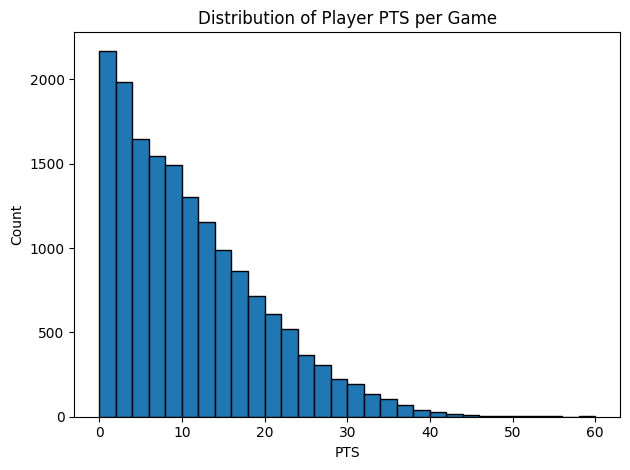

Team-level columns plotted: ['PTS', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV']


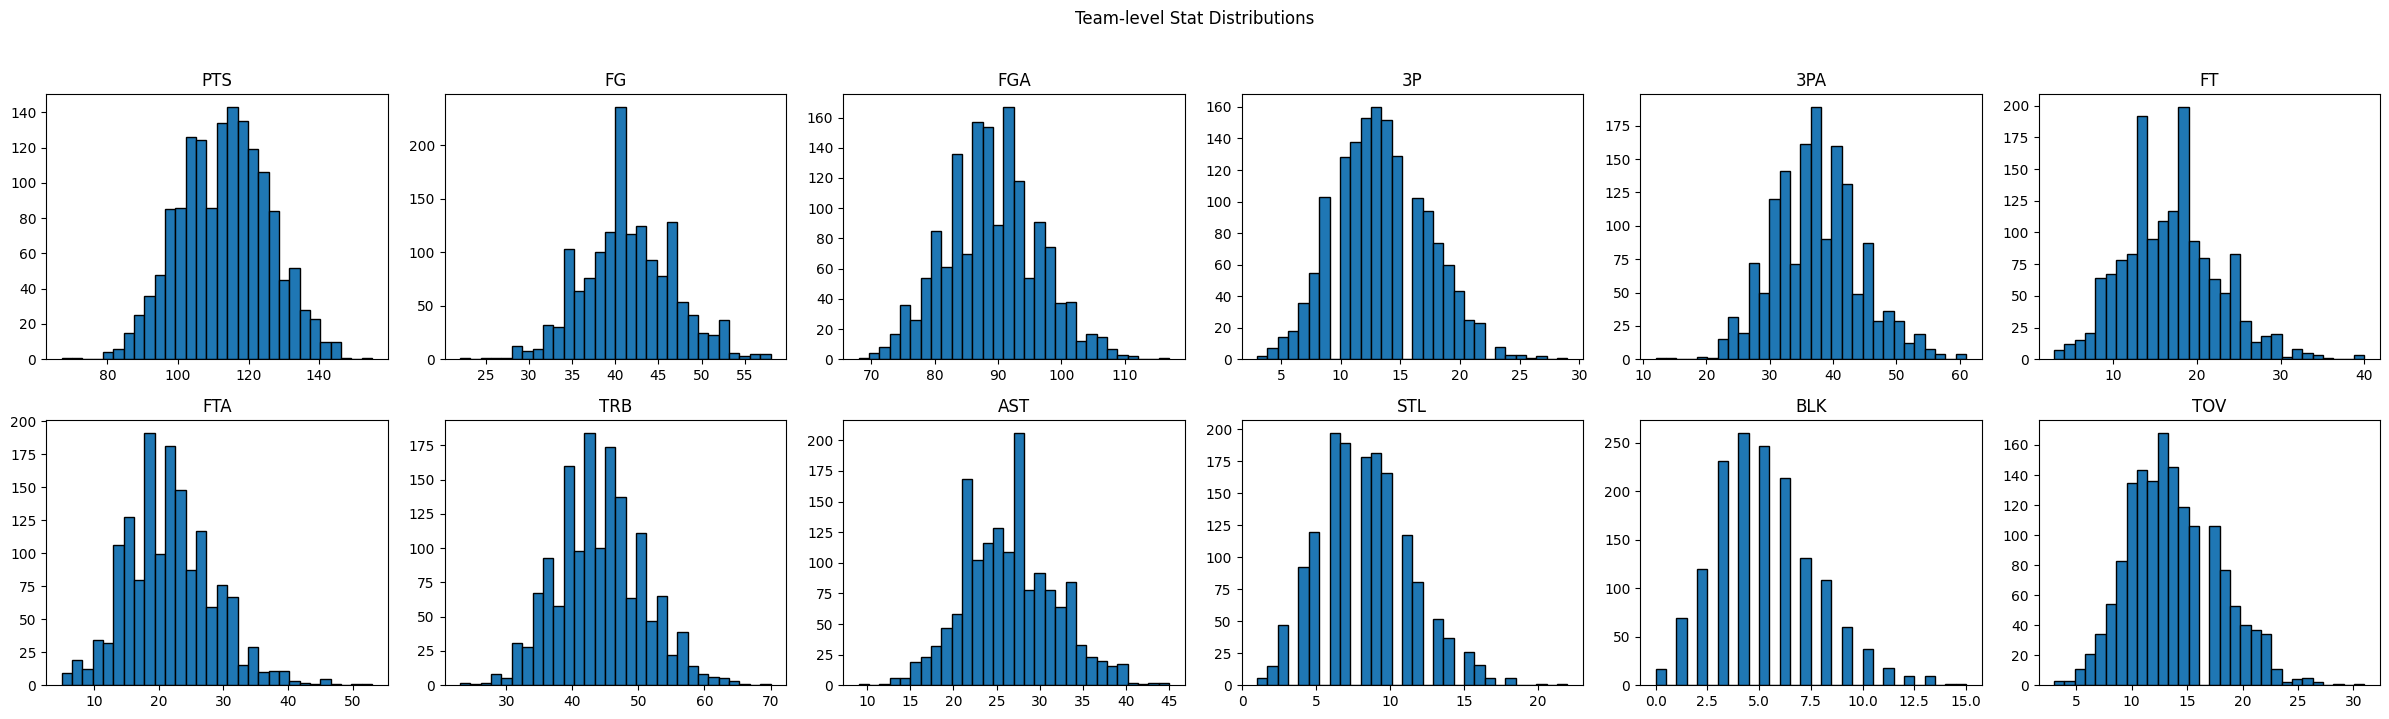

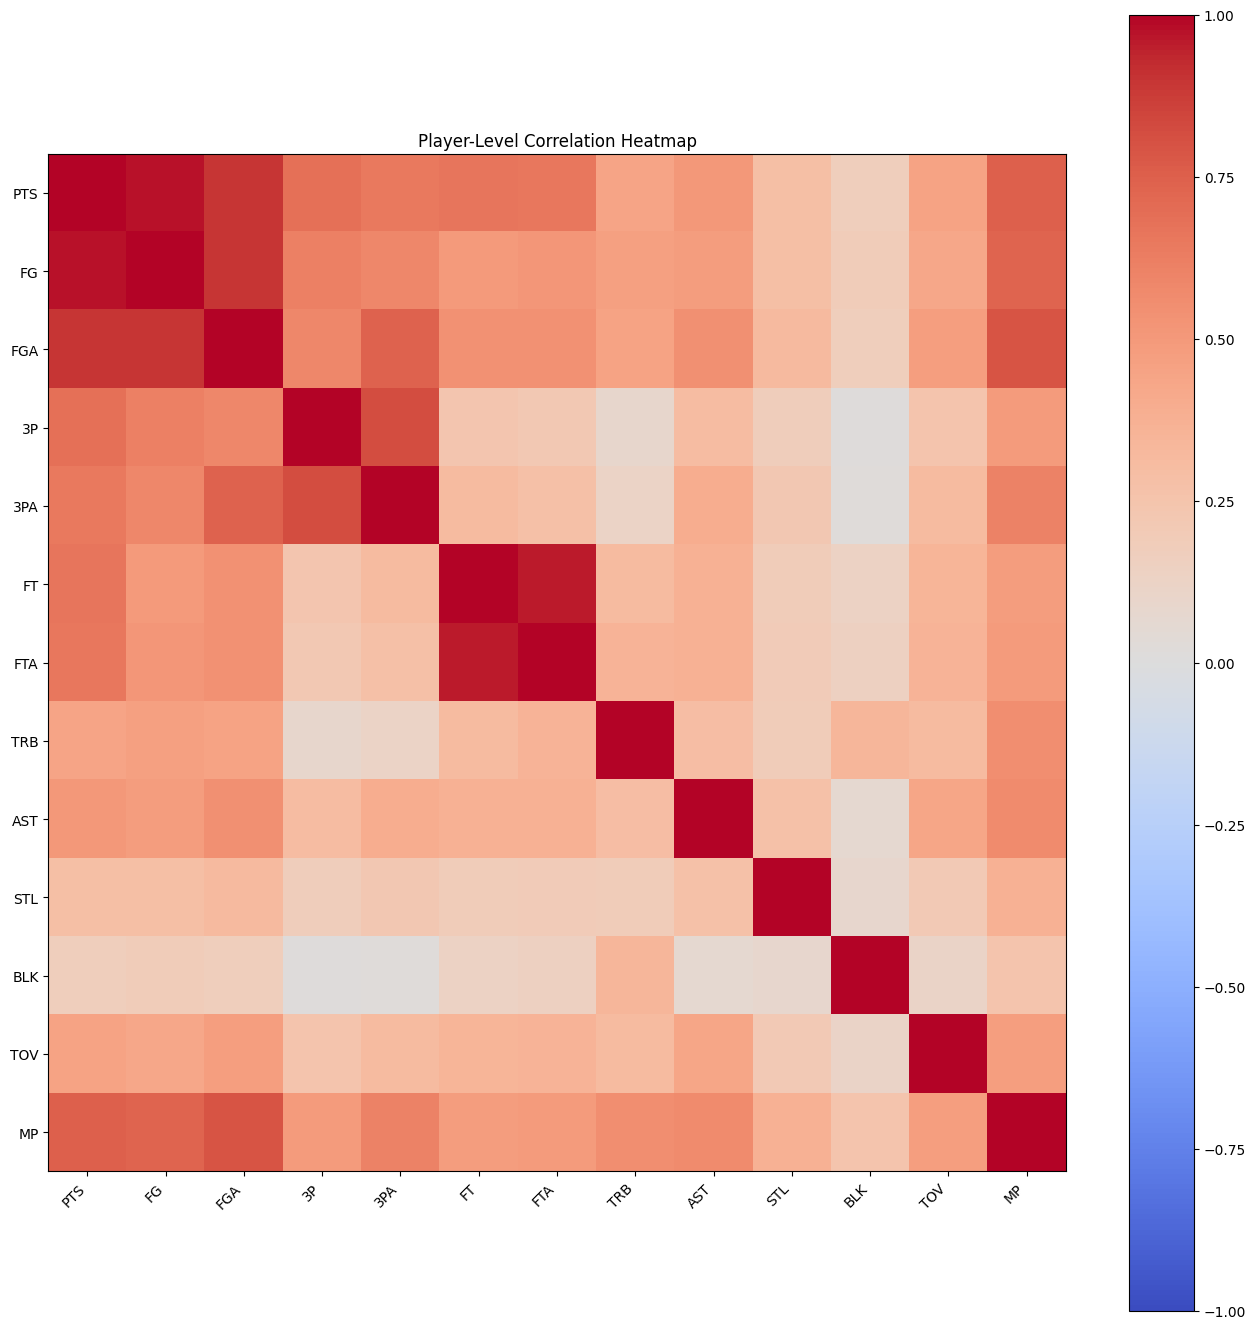

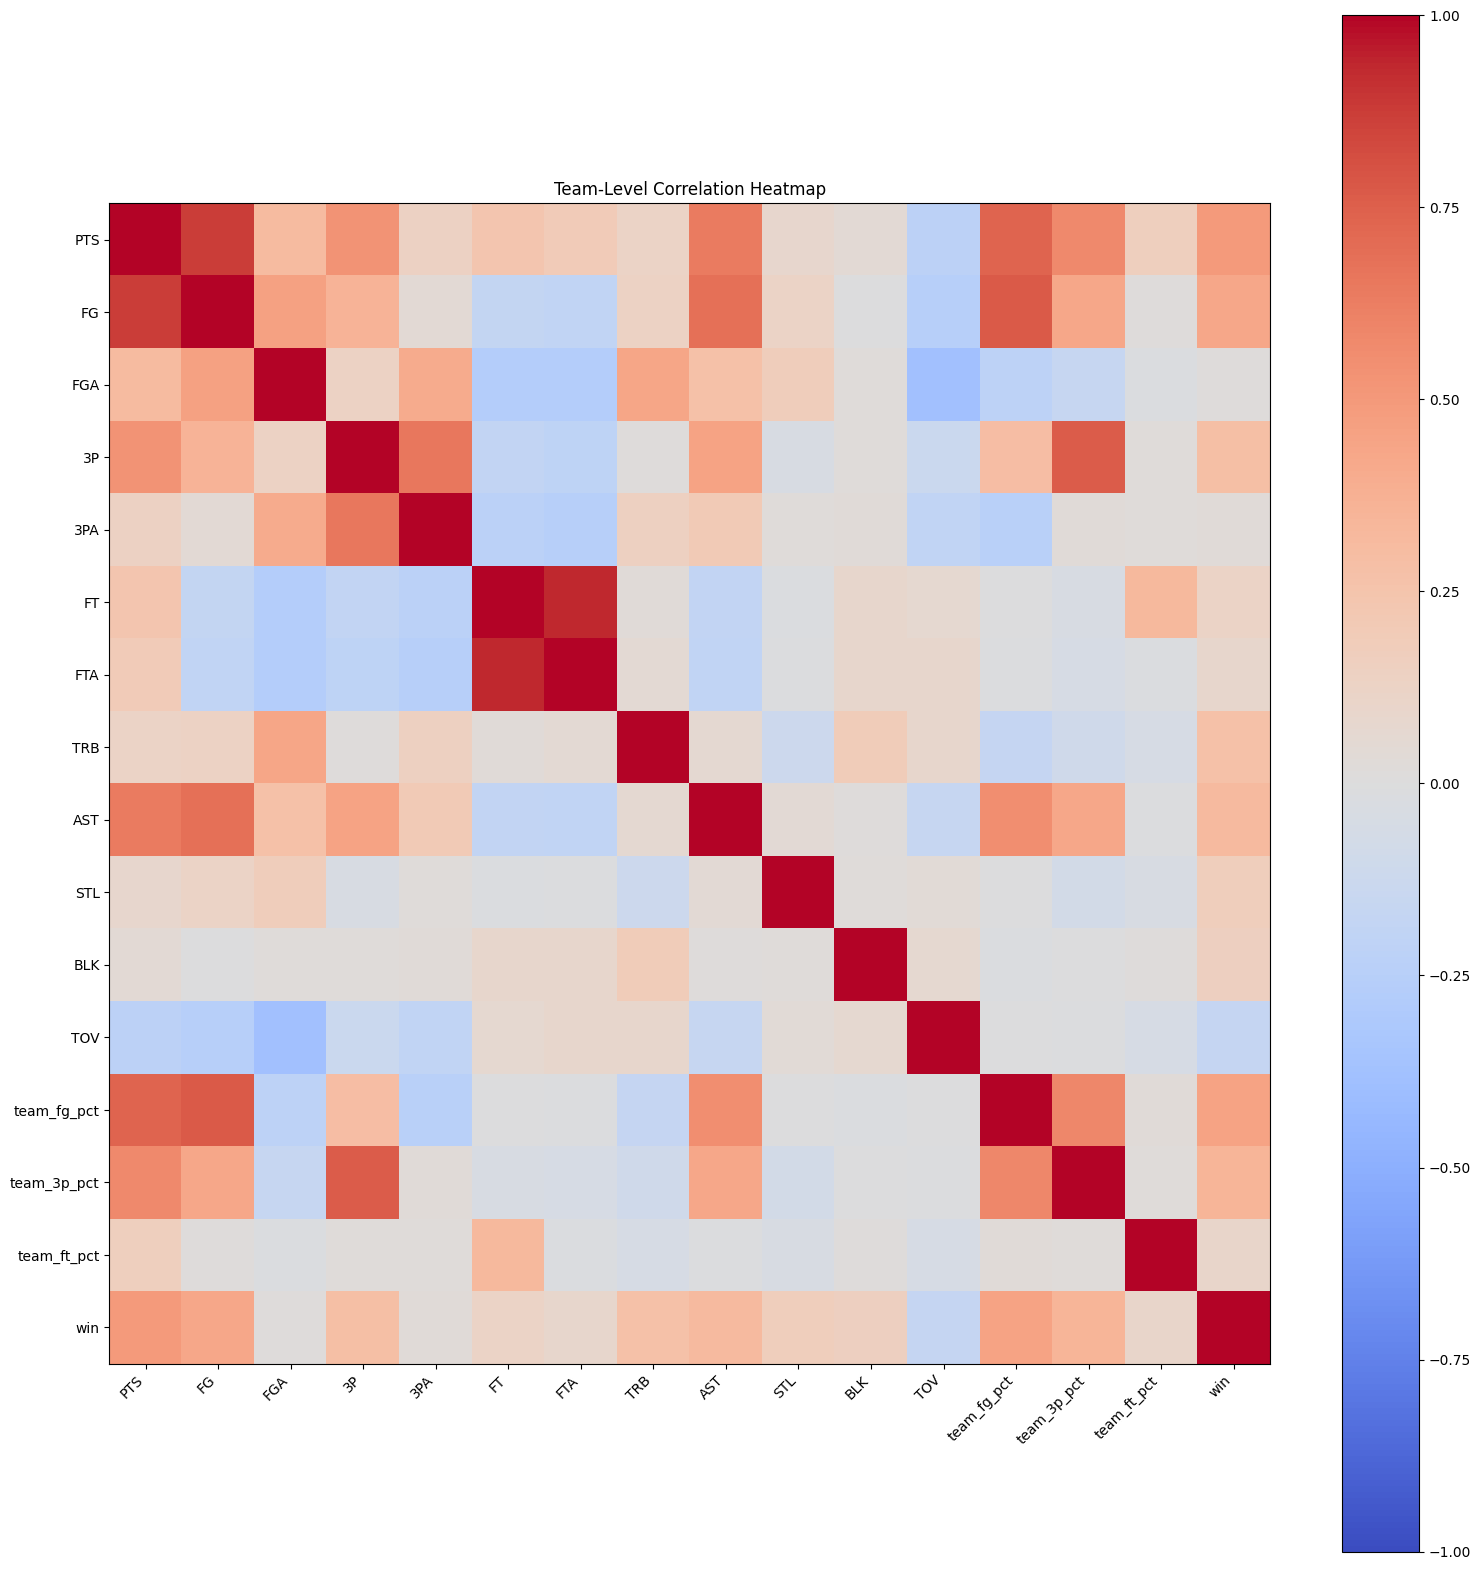

                 PTS  team_fg_pct  team_3p_pct  team_ft_pct    TRB    AST  \
result_label                                                                
Loss          107.01         0.44         0.33         0.77  42.34  24.72   
Win           119.48         0.49         0.39         0.79  45.90  28.10   

                TOV  
result_label         
Loss          14.39  
Win           13.03  


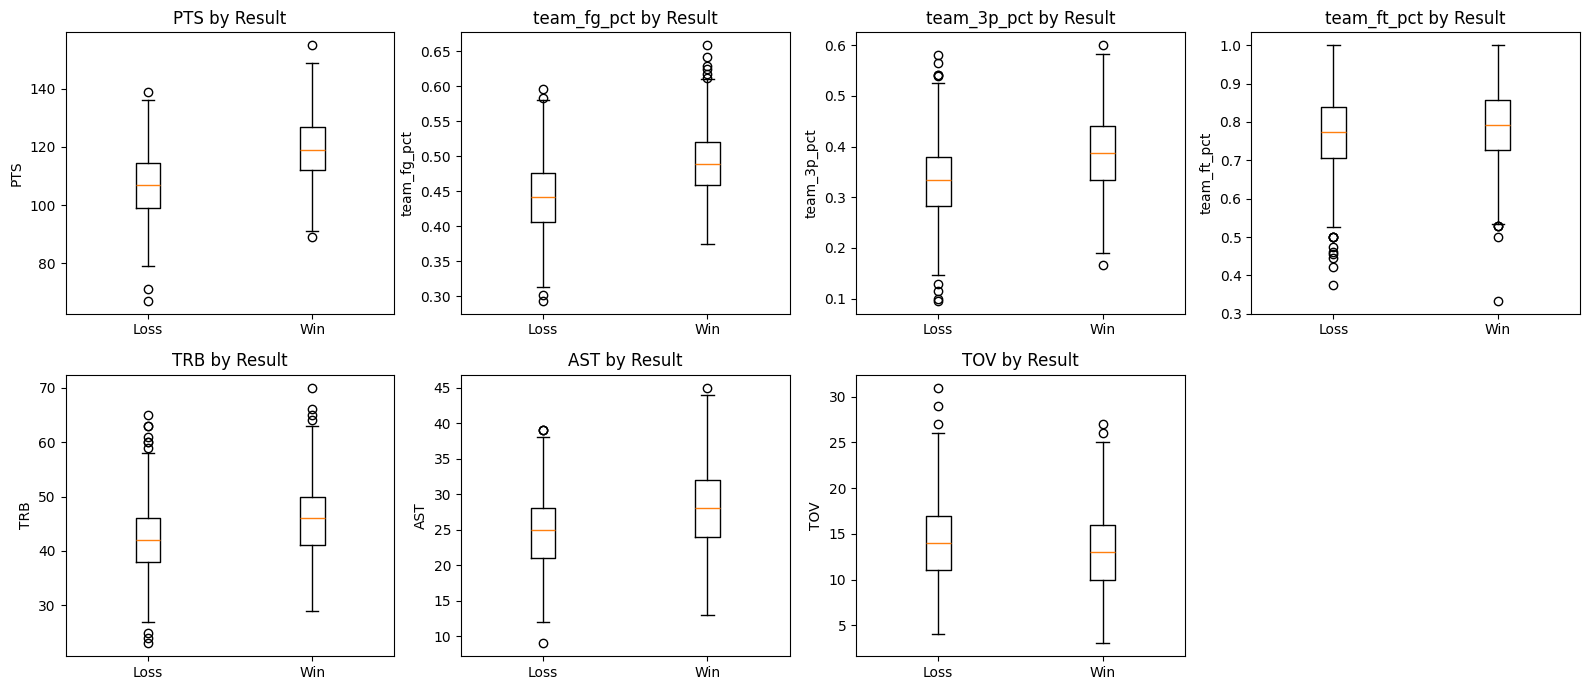

   game_date  mean_pts  mean_3pa  win_rate
0 2024-10-22    113.50     40.50       0.5
1 2024-10-23    116.00     36.00       0.5
2 2024-10-24    109.25     39.25       0.5
3 2024-10-25    113.50     35.70       0.5
4 2024-10-26    113.60     38.60       0.5


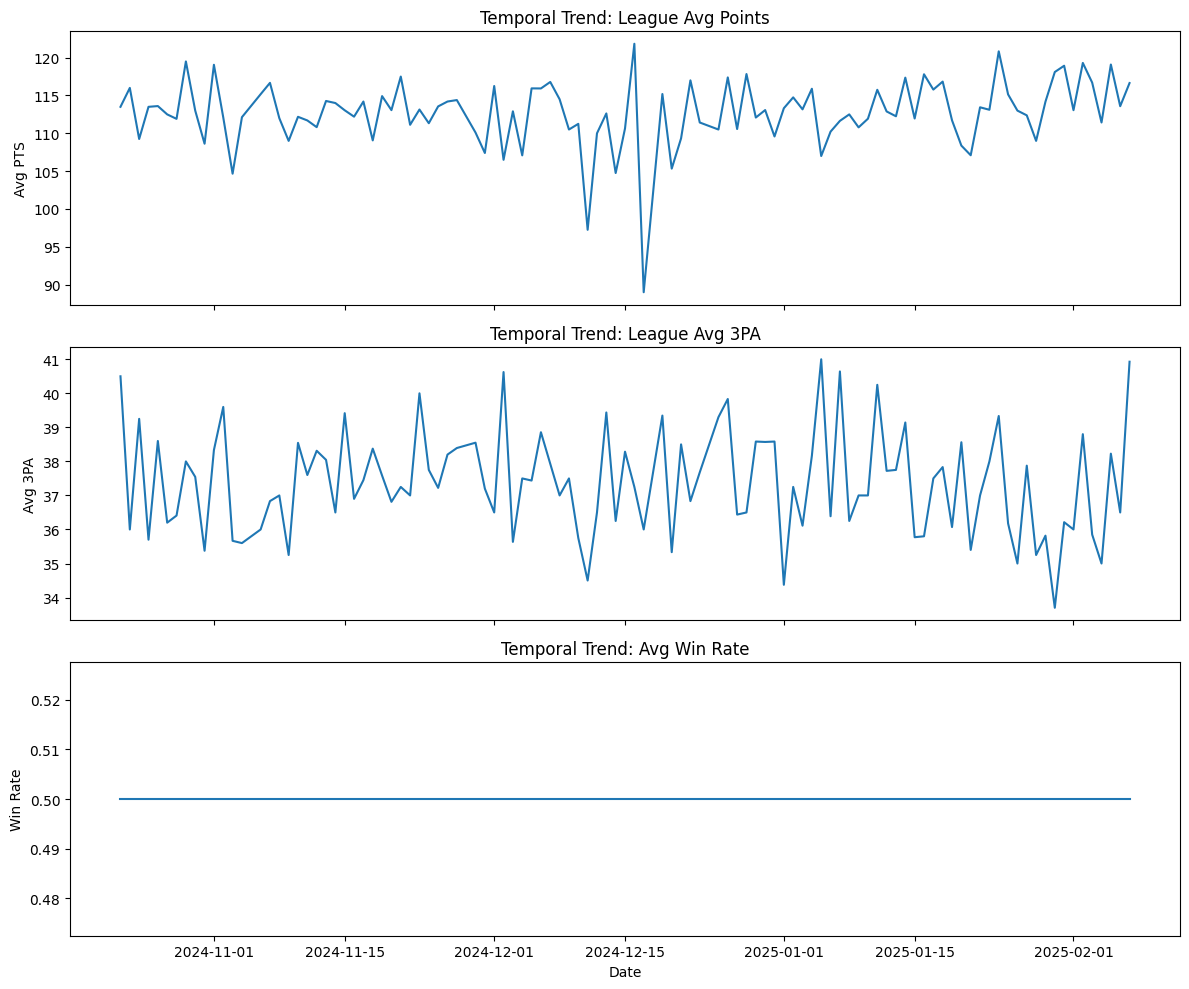

In [4]:
analysis_visuals.plot_player_pts_distribution(player_stats_df)
analysis_visuals.plot_team_stat_distributions(team_stats_df)
analysis_visuals.plot_correlation_heatmap(player_stats_df, team_stats_df)
analysis_visuals.plot_win_loss_feature_comparisons(team_stats_df)
analysis_visuals.plot_temporal_trends(team_stats_df)

## 3. Predict Points Scored

Points scored (PTS) represents the number of successful points made by a player in a game.


################################################################################
# PREDICTION PIPELINE FOR: PTS
################################################################################

Target variable: PTS
Feature variables (16 total): ['MP', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
Final dataset shape: X=(16512, 16), y=(16512,)

Train set: 9907 samples
Test set: 6605 samples

Train set: 9907 samples
Test set: 6605 samples
Tuning random_forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning gradient_boosting...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning xgboost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning lightgbm...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

SUMMARY OF RESULTS FOR PTS

Cross-Validation Performance:
Model                                   CV RMSE      CV MAE     CV R²
Random Forest (Tuned)                  2

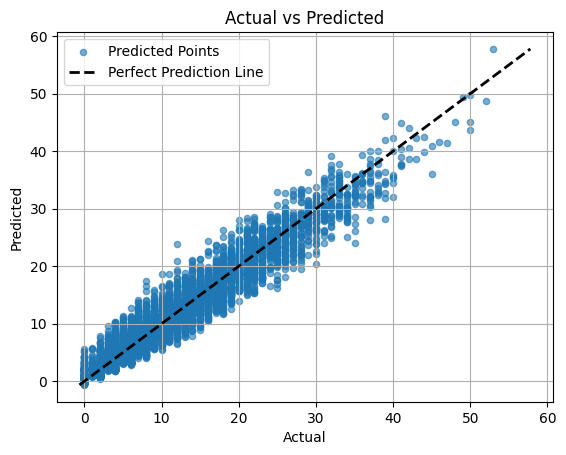

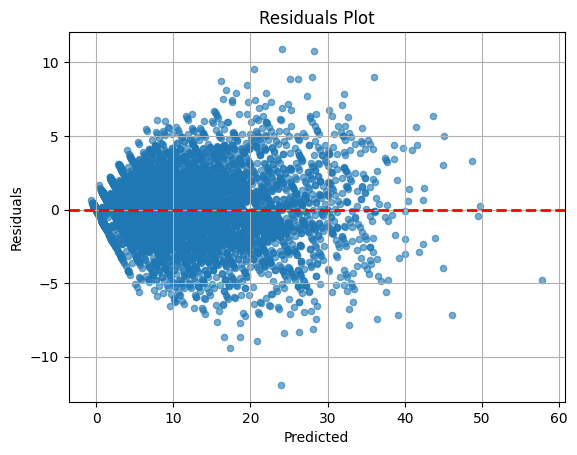

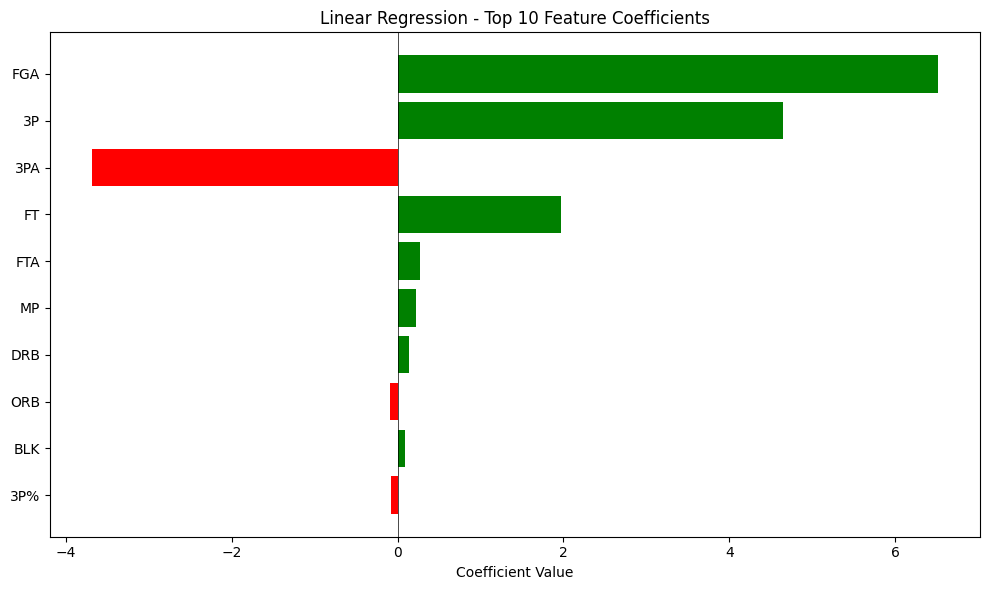

In [5]:
# Run complete pipeline for FG prediction
training.predict_target(player_stats_df, "PTS", classification=False)

## 4. Predict Game Result


################################################################################
# PREDICTION PIPELINE FOR: win
################################################################################

Target variable: win
Feature variables (18 total): ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'MP', 'team_fg_pct', 'team_3p_pct', 'team_ft_pct']
Final dataset shape: X=(1534, 18), y=(1534,)

Train set: 920 samples
Test set: 614 samples

Train set: 920 samples
Test set: 614 samples
Train win rate: 50.00%
Test win rate: 50.00%
Tuning logistic_regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning random_forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning gradient_boosting...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning xgboost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning lightgbm...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

S

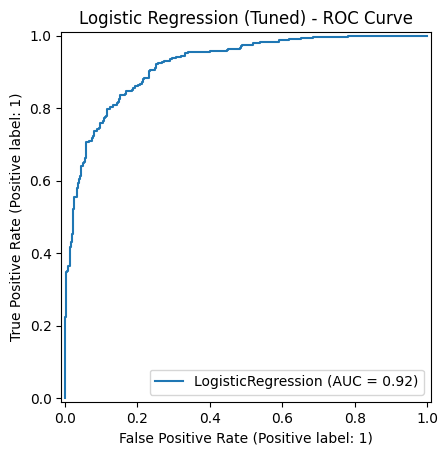

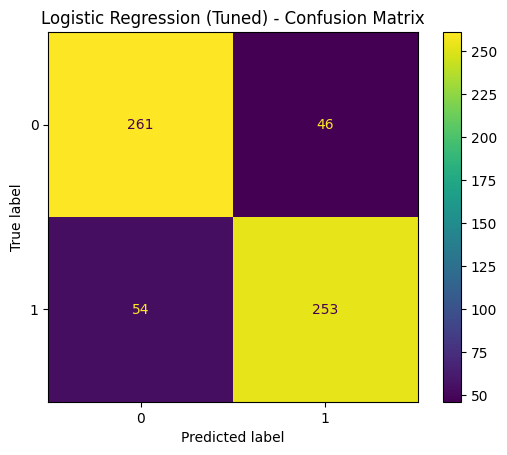

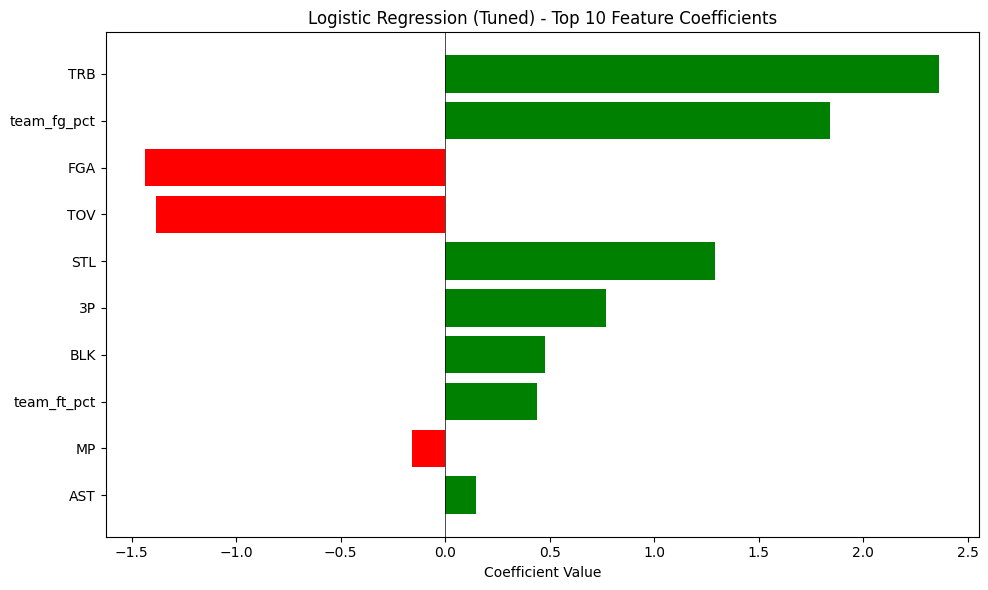

In [6]:
training.predict_target(team_stats_df, 'win', classification=True)